In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy import integrate

In [16]:
class Integrator:
    
    def __init__(self, x,y):
        
        self.x = x
        self.y = y
        self.h = self.x[1] - self.x[0]
        
        self.integral = 0.
        
    def Trapezoid(self):
        
        self.integral = 0.
        
        self.integral += 0.5*(self.y[0] + self.y[-1])
        
        self.integral += np.sum( self.y[1:-1] )
        
        return self.integral*self.h
    
    def GetTrapezoidError(self,f):
        
        d = (f( self.x + self.h ) - 2*f(self.x) + f( self.x - self.h))/self.h**2 
        
        
        max_ = np.max(np.abs(d))
        
        self.error = (max_* (self.x[-1]-self.x[0])**3 )/(12*(len(self.x)-1)**2)
        
        return self.error
    
    def Simpson(self):
        
        self.integral = 0.
        
        self.integral += self.y[0] + self.y[-1]
        
        for i in range( len(y[1:-1]) ):
            if i%2 == 0:
                self.integral += 2*y[i+1] #Se multiplica por 2 en los pares, no en los impares
            else:
                self.integral += 4*y[i+1]
                
        return self.integral*self.h/3
    
    def GetSimpsonError(self,f):
        
        d = (f( self.x + 2*self.h ) - \
             4*f( self.x + self.h ) + \
             6*f(self.x) - \
             4*f( self.x - self.h ) + \
             f(self.x - 2*self.h))/self.h**4
        
        max_ = np.max( np.abs(d) )
        
        self.error = (self.x[-1] - self.x[0])*self.h**4 * max_ / 180.
        
        return self.error

In [61]:
x= np.linspace(-1,1,900)
f= lambda x: np.sqrt(np.e**(-((x)**2)))
y=f(x)

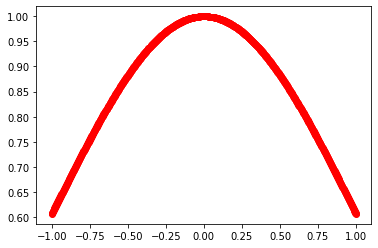

In [62]:
plt.scatter(x,y,color='r')

In [63]:
int1=Integrator(x,y)

In [64]:
int1.Simpson()

1.710798501743193

In [65]:
int1.GetSimpsonError(f)

8.164974869057713e-13